In [1]:
%pwd

'C:\\Users\\kaur2\\OneDrive\\Adv Data mining\\text mining project\\Code'

In [2]:
%cd C:\\Users\\kaur2\\OneDrive\\Adv Data mining\\text mining project\\Code

C:\Users\kaur2\OneDrive\Adv Data mining\text mining project\Code


#Package imports 

In [3]:
#from preamble import *
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make this notebook's output identical/stable across runs
np.random.seed(7)

# set up numpy to display precision upto 3 decimal places and suppresses the use of scientific notation for small numbers
#np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

pd.set_option('display.max_columns', None) # show all columns in a Pandas DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
plt.rcParams['image.cmap'] = "gray"

# Where to save the data and figures
PROJECT_ROOT_DIR = "."
IMAGES_DIR = "images"
DATA_DIR = "data"
MODELS_DIR = "models"
SUB_DIR = "text-mining" # NOTE: update this for each project
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_DIR, SUB_DIR)
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, SUB_DIR)
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, MODELS_DIR, SUB_DIR)
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)
os.makedirs(MODELS_PATH, exist_ok=True)

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Function for saving data downloaded from a URL
from six.moves import urllib
def save_data(file_url, file_name):
    path = os.path.join(DATA_PATH, file_name)
    print("Saving data file", file_name)
    urllib.request.urlretrieve(file_url, path)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='sklearn')
#warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

# Project Name - Amazon Food reviews 

https://www.kaggle.com/snap/amazon-fine-food-reviews

### Group 3 : Fazlur Rehman, Gurleen Kaur
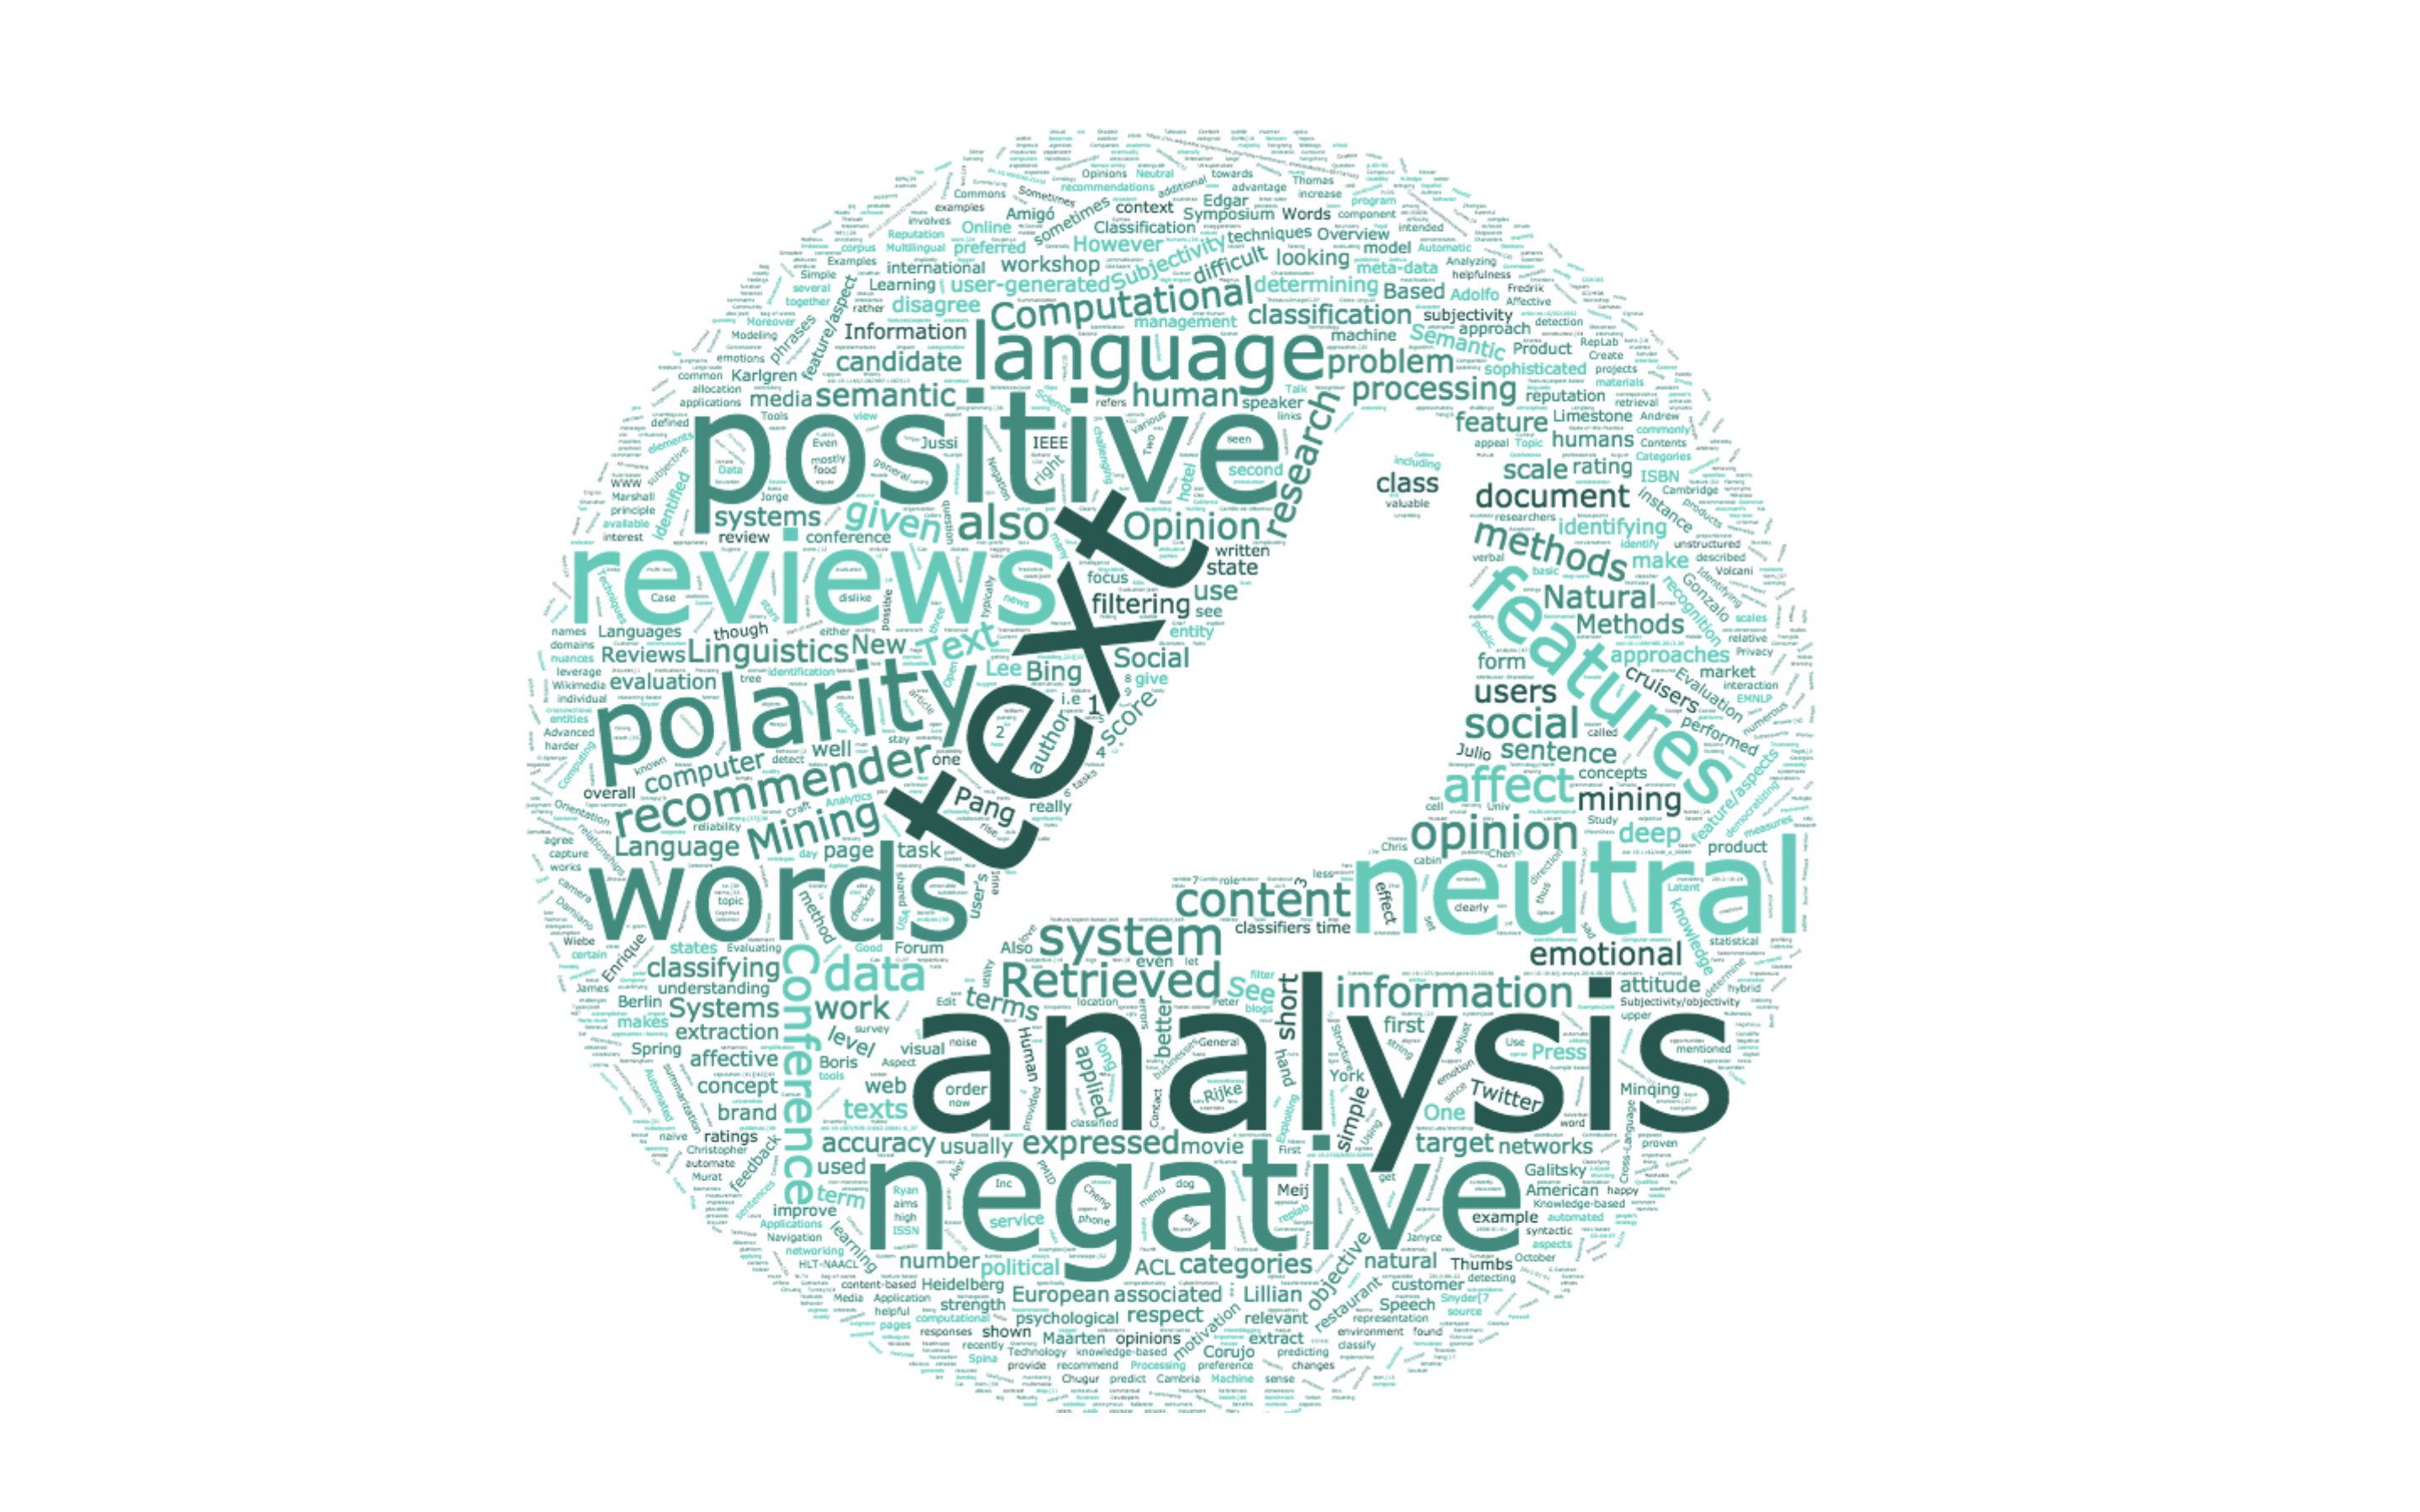


# Agenda 

1. Business Problem 
2. Data Preprocessing and Cleaning
3. Descriptive Analytics 
4. Text Normalization Methods 
5. Models performed 
6. Evaluation 
7. Conclusion

## 1. Business Problem

### Context
This dataset consists of reviews of fine foods from amazon. The data span is over a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Goal 

### To perform sentiment analysis on the amazon food reviews of the products used by the customers and to predict weather the customer is going to provide postive or negative feedback for that product in the future. 

## 2.1 Data Preprocessing

Set up steps for the `NLTK` and `gensim` library:

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
import nltk
import gensim
from gensim import corpora
from pprint import pprint
import pyLDAvis, pyLDAvis.gensim

In [6]:
import pandas as pd
df_amazon = pd.read_csv('Reviews.csv')
df_amazon.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

Text column contains review given by customer
- Score of 1,2 and 3 - Negative review
- Score of 4 and 5 - Positive review

## 2.2 Data Understanding 

In [7]:
df_amazon.shape

(568454, 10)

In [8]:
df_amazon.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator       Score  \
count  568454.000            568454.000              568454.000  568454.000   
mean   284227.500                 1.744                   2.229       4.183   
std    164098.679                 7.637                   8.290       1.310   
min         1.000                 0.000                   0.000       1.000   
25%    142114.250                 0.000                   0.000       4.000   
50%    284227.500                 0.000                   1.000       5.000   
75%    426340.750                 2.000                   2.000       5.000   
max    568454.000               866.000                 923.000       5.000   

            Time  
count  5.685e+05  
mean   1.296e+09  
std    4.804e+07  
min    9.393e+08  
25%    1.271e+09  
50%    1.311e+09  
75%    1.333e+09  
max    1.351e+09

In [9]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## 2.3 Data Cleaning 

### 1. Checking for null values

In [10]:
# Check for any nulls values
df_amazon.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
# Remove null values and unneeded features
df2 = df_amazon.dropna()
df2.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

df_amazon = df_amazon.reset_index(drop=True)

## 2. Dropping Columns 
Let's focus on texual data and ratings for text classification.

In [12]:
food_reviews_df = df2[['Text', 'Score']].dropna()
food_reviews_df.head()

Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5

## 3. Considering only 10000 rows 

In [13]:
final_reviews = food_reviews_df.head(10000)
print(final_reviews.Score.value_counts())
final_reviews.shape

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64


(10000, 2)

## 4. Understanding nature of Score text

### Selecting rows with Score = 3

In [14]:
score_3 = df_amazon['Score']==3

# use this boolean variable to filter the dataframe
score_is_3 = df_amazon[score_3]

# rows with score of 3 
score_is_3[['Score','Summary', 'Text' ]].head(4)

Score         Summary                                               Text
45      3  Hearty Oatmeal  This seems a little more wholesome than some o...
47      3           Mushy  The flavors are good.  However, I do not see a...
49      3      Same stuff  This is the same stuff you can buy at the big ...
53      3  not ass kickin  we're used to spicy foods down here in south t...

Observation : score 3 has neautral reviews, hence we can consider 3 to be negative review. 

# 3. Customer Review Statistics 

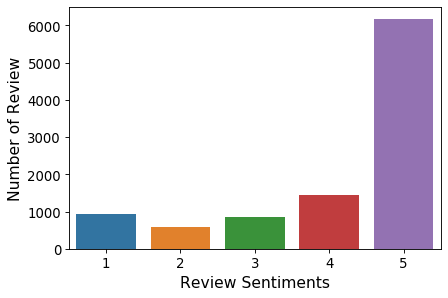

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64


In [15]:
sns.countplot(
  x=final_reviews['Score'],
  data=final_reviews.groupby('Score').count()
)
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()
print(final_reviews.Score.value_counts())

we have more reviews with ratings 5, so we can treat  
- Score of 1,2 and 3 - Negative review
- Score of 4 and 5 - Positive review

In [16]:
final_reviews['Score'] = final_reviews['Score'].replace([1,2,3],'neg')
final_reviews['Score'] = final_reviews['Score'].replace([4,5],'pos')
final_reviews.head()

C:\Users\kaur2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kaur2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text Score
0  I have bought several of the Vitality canned d...   pos
1  Product arrived labeled as Jumbo Salted Peanut...   neg
2  This is a confection that has been around a fe...   pos
3  If you are looking for the secret ingredient i...   neg
4  Great taffy at a great price.  There was a wid...   pos

## Q) How many customers provided Postive reviews for the product?

pos    7616
neg    2384
Name: Score, dtype: int64


Text(0.5, 1.0, 'Score count for Reviews')

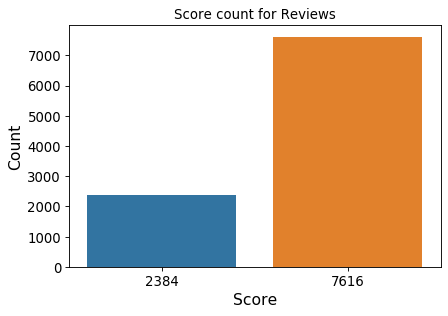

In [17]:
#new bar plot 
sns.countplot(
  x=final_reviews.Score,
  data=final_reviews.Score.value_counts(),
)
print(final_reviews.Score.value_counts())
#final_reviews.Score.value_counts().plot(kind='bar')
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Score count for Reviews")

#### There is an uneven sentiment , the postive feelings seems to be more.

In [18]:
#labels = ratings.apply(lambda x: 1 if x > 4 else 0)
labels = final_reviews['Score']
print('Class distribution')
print(labels.value_counts() / len(labels))

2020-12-11 15:01:46,625 : INFO : NumExpr defaulting to 8 threads.


Class distribution
pos    0.762
neg    0.238
Name: Score, dtype: float64


# Word Cloud

In [19]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

final_reviews['Text'] = final_reviews['Text'].apply(lambda text: remove_stopwords(text))
final_reviews.head()

C:\Users\kaur2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text Score
0  I bought several Vitality canned dog food prod...   pos
1  Product arrived labeled Jumbo Salted Peanuts.....   neg
2  This confection around centuries. It light, pi...   pos
3  If looking secret ingredient Robitussin I beli...   neg
4  Great taffy great price. There wide assortment...   pos

In [20]:
##Score Analysis
positive_reviews = final_reviews[final_reviews.Score == "pos"]
negative_reviews = final_reviews[final_reviews.Score == "neg"]
print(positive_reviews.shape, negative_reviews.shape)

(7616, 2) (2384, 2)


## Q) What kind of positive words appeared more often ??

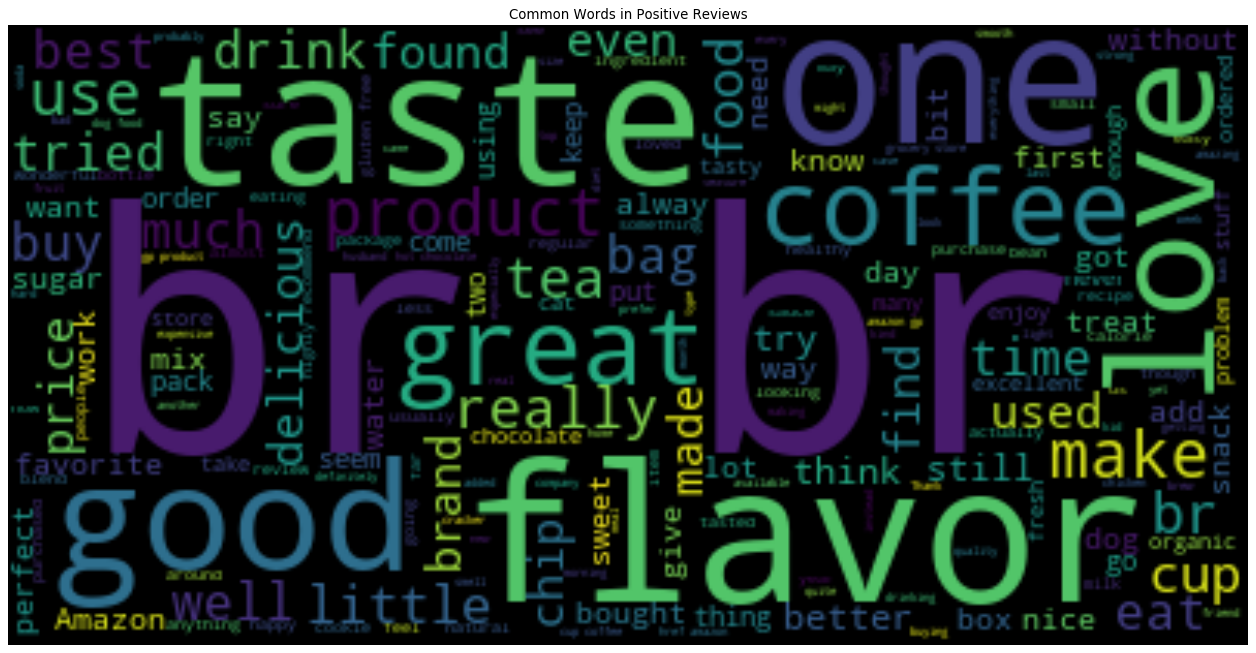

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

positive_reviews_text = " ".join(positive_reviews.Text.to_numpy().tolist())
negative_reviews_text = " ".join(negative_reviews.Text.to_numpy().tolist())

positive_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(positive_reviews_text)
negative_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negative_reviews_text)

def show_word_cloud(cloud, title):
  plt.figure(figsize = (20, 20))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

show_word_cloud(positive_reviews_cloud, "Common Words in Positive Reviews")

## Words "like", "Love" , "Good", "great", "flavor" appeared to be of bigger size that means its oftnly speacified by the customer

## #Negative Reviews Word cloud 

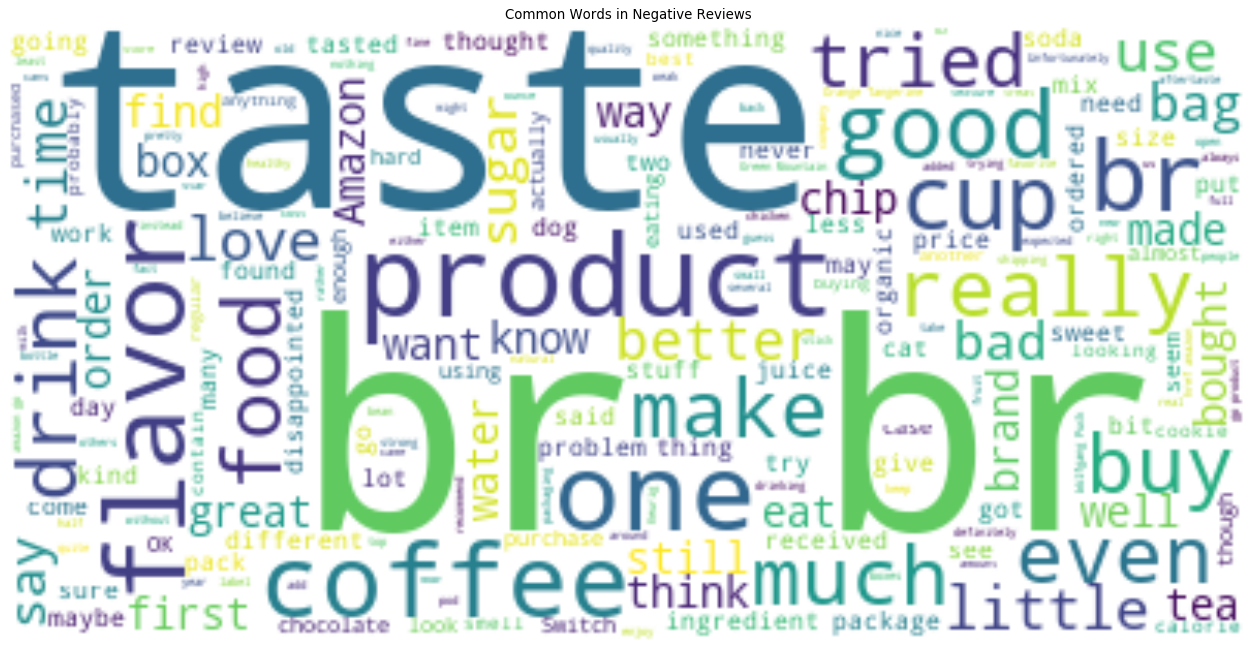

In [22]:
show_word_cloud(negative_reviews_cloud, "Common Words in Negative Reviews")

### Suprisingly, we cant see more of the negative word over here except - "bad", "dissapointed", "little", may be because they were combined with few neutral reviews.

# Analysing Positive Reviews 

<BarContainer object of 8 artists>

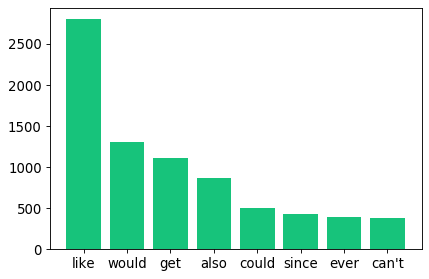

In [23]:
def create_corpus(target):
    corpus=[]
    
    for x in final_reviews[final_reviews['Score']==target ]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

from collections import defaultdict,Counter

corpus=create_corpus("pos")

dic=defaultdict(int)
for word in corpus:
    if word in STOPWORDS:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:8] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

# Analysing Negative Reviews 

<BarContainer object of 8 artists>

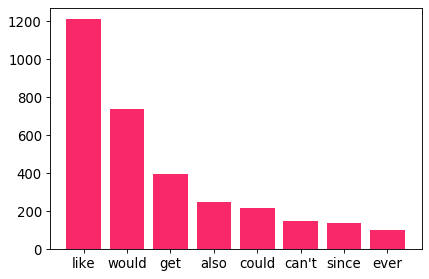

In [24]:
corpus=create_corpus("neg")

dic=defaultdict(int)
for word in corpus:
    if word in STOPWORDS:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:8] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

## Analysis of the punctuations

Text(0, 0.5, 'Count')

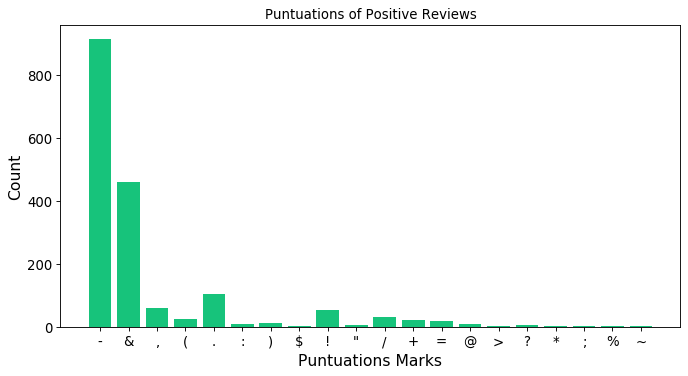

In [25]:
plt.figure(figsize=(10,5))
corpus=create_corpus("pos")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')
plt.title("Puntuations of Positive Reviews")
plt.xlabel("Puntuations Marks")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

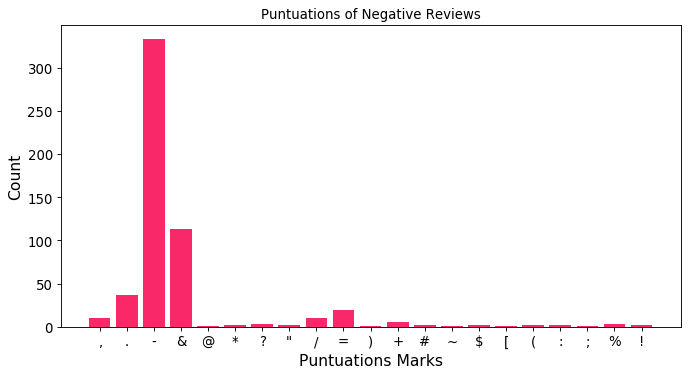

In [26]:
plt.figure(figsize=(10,5))
corpus=create_corpus("neg")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='#F92969')
plt.title("Puntuations of Negative Reviews")
plt.xlabel("Puntuations Marks")
plt.ylabel("Count")

Text(0, 0.5, 'WOrds')

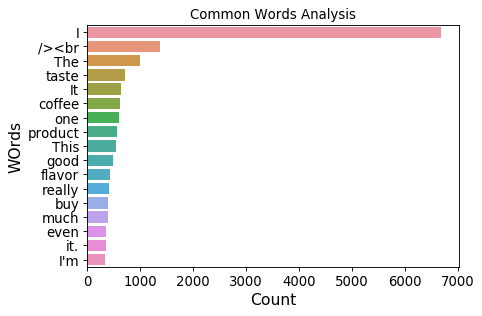

In [27]:
##Common Words Analysis 

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    if (word not in STOPWORDS) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
plt.title("Common Words Analysis")
plt.xlabel("Count")
plt.ylabel("WOrds")

## Text Data Processing

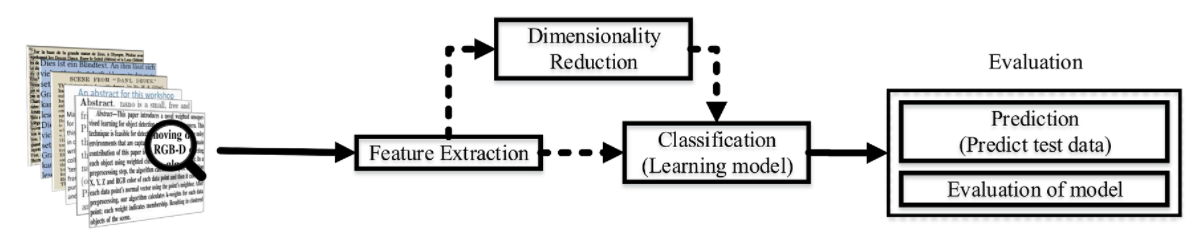

## Feature Engineering

### 1. Convert text to lowercase

In [28]:
final_reviews.loc[:, 'Text'] = final_reviews['Text'].str.lower()
final_reviews['Text'].head(4)

C:\Users\kaur2\Anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


0    i bought several vitality canned dog food prod...
1    product arrived labeled jumbo salted peanuts.....
2    this confection around centuries. it light, pi...
3    if looking secret ingredient robitussin i beli...
Name: Text, dtype: object

### 2. Tokenization

In [29]:
#word tokenization
from nltk.tokenize import word_tokenize

text= final_reviews.iloc[12]['Text']

tokenized_word=word_tokenize(text)
print(tokenized_word)
print("\nLength of the tokenised word",len(tokenized_word))

['my', 'cats', 'happily', 'eating', 'felidae', 'platinum', 'two', 'years', '.', 'i', 'got', 'new', 'bag', 'shape', 'food', 'different', '.', 'they', 'tried', 'new', 'food', 'i', 'first', 'put', 'bowls', 'bowls', 'sit', 'full', 'kitties', 'touch', 'food', '.', 'i', "'ve", 'noticed', 'similar', 'reviews', 'related', 'formula', 'changes', 'past', '.', 'unfortunately', ',', 'i', 'need', 'find', 'new', 'food', 'cats', 'eat', '.']

Length of the tokenised word 52


### 2.1 Frequency distribution Plot

<FreqDist with 38 samples and 52 outcomes>


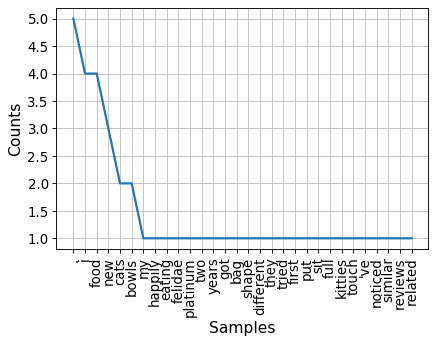

In [30]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

fdist.most_common(3)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### 3. Stopwords

In [31]:
# stopwords using spacy 
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list)
print("\nlength of tokenized list",len(token_list))
print("\n Filtered sentence\n",filtered_sentence)  
print("\nlength of filtered sentence",len(filtered_sentence))

# remove all tokens that are not alphabetic
filtered_words = [word for word in filtered_sentence if word.isalpha()]
print('\n',filtered_words)
print("\nlength of words after removing puntuations-",len(filtered_words))

['my', 'cats', 'happily', 'eating', 'felidae', 'platinum', 'two', 'years', '.', 'i', 'got', 'new', 'bag', 'shape', 'food', 'different', '.', 'they', 'tried', 'new', 'food', 'i', 'first', 'put', 'bowls', 'bowls', 'sit', 'full', 'kitties', 'touch', 'food', '.', 'i', "'ve", 'noticed', 'similar', 'reviews', 'related', 'formula', 'changes', 'past', '.', 'unfortunately', ',', 'i', 'need', 'find', 'new', 'food', 'cats', 'eat', '.']

length of tokenized list 52

 Filtered sentence
 ['cats', 'happily', 'eating', 'felidae', 'platinum', 'years', '.', 'got', 'new', 'bag', 'shape', 'food', 'different', '.', 'tried', 'new', 'food', 'bowls', 'bowls', 'sit', 'kitties', 'touch', 'food', '.', 'noticed', 'similar', 'reviews', 'related', 'formula', 'changes', 'past', '.', 'unfortunately', ',', 'need', 'find', 'new', 'food', 'cats', 'eat', '.']

length of filtered sentence 41

 ['cats', 'happily', 'eating', 'felidae', 'platinum', 'years', 'got', 'new', 'bag', 'shape', 'food', 'different', 'tried', 'new', '

The tokenized list is reduced to 35 words after the removal of stopwords. 

## 4. Text Normalization Methods

Text normalization is a process of transforming a word into a single canonical form. This can be done by two processes, stemming and lemmatization

### 4.1 Lemmatization

In [32]:
#-------Lemmatization-----

lemma_word = []
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
for w in filtered_words:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    lemma_word.append(word3)
print("\nfiltered words",filtered_words)
print("\n",lemma_word)
print("\nLength of lemmatized words", len(lemma_word))


filtered words ['cats', 'happily', 'eating', 'felidae', 'platinum', 'years', 'got', 'new', 'bag', 'shape', 'food', 'different', 'tried', 'new', 'food', 'bowls', 'bowls', 'sit', 'kitties', 'touch', 'food', 'noticed', 'similar', 'reviews', 'related', 'formula', 'changes', 'past', 'unfortunately', 'need', 'find', 'new', 'food', 'cats', 'eat']

 ['cat', 'happily', 'eat', 'felidae', 'platinum', 'year', 'get', 'new', 'bag', 'shape', 'food', 'different', 'try', 'new', 'food', 'bowl', 'bowl', 'sit', 'kitty', 'touch', 'food', 'notice', 'similar', 'review', 'relate', 'formula', 'change', 'past', 'unfortunately', 'need', 'find', 'new', 'food', 'cat', 'eat']

Length of lemmatized words 35


Here, v stands for verb, a stands for adjective and n stands for noun. The lemmatizer only lemmatizes those words which match the pos parameter of the lemmatize method.

### 4.2 BIGRAM 

In [33]:
from nltk import collocations
c_amazon = collocations.BigramCollocationFinder.from_words(filtered_words)
print("\n The most frequent bigram words")
c_amazon.ngram_fd.most_common(20)


 The most frequent bigram words


[(('new', 'food'), 2),
 (('cats', 'happily'), 1),
 (('happily', 'eating'), 1),
 (('eating', 'felidae'), 1),
 (('felidae', 'platinum'), 1),
 (('platinum', 'years'), 1),
 (('years', 'got'), 1),
 (('got', 'new'), 1),
 (('new', 'bag'), 1),
 (('bag', 'shape'), 1),
 (('shape', 'food'), 1),
 (('food', 'different'), 1),
 (('different', 'tried'), 1),
 (('tried', 'new'), 1),
 (('food', 'bowls'), 1),
 (('bowls', 'bowls'), 1),
 (('bowls', 'sit'), 1),
 (('sit', 'kitties'), 1),
 (('kitties', 'touch'), 1),
 (('touch', 'food'), 1)]

### 5. Vectorization 

### 5.1 CountVectorizer

In [34]:
# BOW using Countvectorizer 
#generate matrix by using CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features=5000)
text_counts= cv.fit_transform(final_reviews['Text'])
print("\nCount vectors")
print(text_counts.shape)
print(text_counts[0])


Count vectors
(10000, 5000)
  (0, 535)	1
  (0, 694)	1
  (0, 1361)	1
  (0, 1767)	1
  (0, 3402)	1
  (0, 1930)	1
  (0, 3459)	1
  (0, 3400)	2
  (0, 2587)	1
  (0, 2528)	1
  (0, 4227)	1
  (0, 3391)	1
  (0, 2716)	1
  (0, 4049)	1
  (0, 458)	2
  (0, 1701)	1


### 5.2 Tf-IDF vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
#final_tf = final_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(final_reviews['Text'])
print(final_reviews['Text'][0])
print("\nTf-idf matrix",tf_data[0])

i bought several vitality canned dog food products found good quality. the product looks like stew processed meat smells better. my labrador finicky appreciates product better most.

Tf-idf matrix   (0, 2834)	0.250820136684963
  (0, 1689)	0.32341208699456264
  (0, 2867)	0.13251971099659923
  (0, 459)	0.2856174945770522
  (0, 4019)	0.24500110095200953
  (0, 2710)	0.23618321310794965
  (0, 3382)	0.28324335190507155
  (0, 4204)	0.35021119093519404
  (0, 2517)	0.09814878797863018
  (0, 2576)	0.23848252600763967
  (0, 3391)	0.2332844378247172
  (0, 4466)	0.09898113925551602
  (0, 3451)	0.17744841913153428
  (0, 1912)	0.10345808368834
  (0, 1775)	0.15683543187535953
  (0, 3393)	0.1863001172401992
  (0, 1753)	0.15302142100003788
  (0, 1346)	0.19048846231173813
  (0, 695)	0.2419864005912429
  (0, 3884)	0.19761085230142386
  (0, 538)	0.15855868186378994


### 6 Model Building 

### 6.1 Data Preperation 

In [36]:
##-------DATASET PREPERATION-----
# X = df['text'] #features
# y = df['Score'] #label

# Split dataset into train and test 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, final_reviews['Score'], test_size=0.3, random_state=1)


### 6.2 Training Classifiers and predicting accuracy of Models 

Classifiers used are :
1. Multinomial Naive Bayes 
2. Linear SVM 
3. Logistic Regression 

In [37]:

#---Naive Bayes-------

# Model Building and Evaluation 
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
model_1 = MultinomialNB().fit(X_train, y_train)
predicted_nb= model_1.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_nb))


# -------SVM---------- 

#importing SVC module from SVM classifier
from sklearn.svm import LinearSVC


# Training
model2 = LinearSVC(max_iter=10000)
model2.fit(X_train, y_train)
y_pred_svc = model2.predict(X_test)

# Evaluation
print("SVC Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

#----Logistic Regression------- 
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(max_iter=10000)
model_3.fit(X_train, y_train)
y_pred_lr = model_3.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))


MultinomialNB Accuracy: 0.8416666666666667
SVC Accuracy: 0.8163333333333334
Logistic Regression Accuracy: 0.853


We achived the highest accuracy of 85.3% with  Logistic Regression model

### 6.3 Grid Search CV 

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Building a pipeline 
pipe = Pipeline([("classifier", LogisticRegression())])


param_grid = [{"classifier": [LogisticRegression(solver='liblinear')],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": [0.1, 1, 10]
              },
                {"classifier": [LinearSVC(max_iter= 10000)],
                 "classifier__penalty": ['l2'],
                 "classifier__C": [0.01, 5],
                },
                {"classifier": [MultinomialNB()],
                 "classifier__alpha": [0.7, 1.0],
                 "classifier__fit_prior": [True, False],
                }]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy',verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

print("The best estimator is:",best_model.best_estimator_)
print("\nThe mean accuracy of the model is:",best_model.score(X_test,y_test))


The best estimator is: Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

The mean accuracy of the model is: 0.8526666666666667


### 6.4  Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix


confusion = confusion_matrix(y_test, y_pred_lr)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 460  260]
 [ 181 2099]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         neg       0.72      0.64      0.68       720
         pos       0.89      0.92      0.90      2280

    accuracy                           0.85      3000
   macro avg       0.80      0.78      0.79      3000
weighted avg       0.85      0.85      0.85      3000



Precision tell us what % of predictions are correct: TP/(TP+FP), 89% of "pos" and 72% of "neg" reviews were correctly predicted 

Recall- Fraction of positives that were correctly identified = TP/(TP+FN), 92% of positivecases were correctly identified 

F1 score – What percent of positive predictions were correct? = 90% 

# 7.  Conclusion 

1. Our model did a good job in predicting positive reviews.
2. Accuracy of one of best classifier in predicting reviews came out to 85%

## 8. Business Recommendation 

1. Positive reviews can be used as Customer testimonials. Key to sell their products.

2. Negation or neutral reviews provide company with an opportunity to learn and improve their products and prevent churn.

3. Identify fake reviews.

# Thank You! any Question ??